In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv("./dataset/River/River_Arno.csv")
data.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [2]:
# 计算每个特征的缺失值比例
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage.sort_values(ascending=False)


Rainfall_Consuma             84.386029
Rainfall_Stia                84.386029
Rainfall_S_Savino            84.386029
Rainfall_Laterina            84.386029
Rainfall_Camaldoli           84.386029
Rainfall_Montevarchi         79.956188
Rainfall_Bibbiena            71.059998
Rainfall_Vernio              47.876354
Rainfall_Incisa              44.407935
Rainfall_Cavallina           26.664233
Rainfall_S_Agata             26.664233
Rainfall_Mangona             26.664233
Rainfall_S_Piero             26.664233
Rainfall_Le_Croci            26.664233
Temperature_Firenze          24.644031
Hydrometry_Nave_di_Rosano     0.584155
Date                          0.000000
dtype: float64

In [3]:
# 删除缺失值超过80%的列
data_cleaned = data.drop(columns=missing_percentage[missing_percentage > 80].index)

# 使用中位数填充其他列的缺失值
for column in data_cleaned.columns:
    if data_cleaned[column].isnull().sum() > 0:
        median_value = data_cleaned[column].median()
        data_cleaned[column].fillna(median_value, inplace=True)

# 删除目标变量的缺失值
data_cleaned.dropna(subset=['Hydrometry_Nave_di_Rosano'], inplace=True)

# 检查缺失值处理后的数据
data_cleaned.isnull().sum()


Date                         0
Rainfall_Le_Croci            0
Rainfall_Cavallina           0
Rainfall_S_Agata             0
Rainfall_Mangona             0
Rainfall_S_Piero             0
Rainfall_Vernio              0
Rainfall_Incisa              0
Rainfall_Montevarchi         0
Rainfall_Bibbiena            0
Temperature_Firenze          0
Hydrometry_Nave_di_Rosano    0
dtype: int64

In [4]:
# 将日期转换为datetime格式
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], dayfirst=True)

# 提取年、月和日作为新的特征
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day

# 删除原始的Date列
data_cleaned.drop(columns=['Date'], inplace=True)

data_cleaned.head()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_Bibbiena,Temperature_Firenze,Hydrometry_Nave_di_Rosano,Year,Month,Day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.35,1.82,1998,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.35,1.94,1998,1,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.35,2.11,1998,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.35,1.84,1998,1,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.35,1.88,1998,1,5


In [5]:
# 获取描述性统计信息
data_cleaned.describe()


,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_Bibbiena,Temperature_Firenze,Hydrometry_Nave_di_Rosano,Year,Month,Day
count,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000,8217.000000
mean,2.295315,1.961543,1.958111,2.449897,1.812292,1.780772,1.298089,0.412243,0.764294,16.542449,1.471400,2008.754412,6.456249,15.727638
std,7.010266,6.661891,6.249672,7.765961,5.798613,7.015212,4.872737,2.859486,4.033881,6.475759,0.614596,6.497944,3.448722,8.799567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.700000,0.000000,1998.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,1.100000,2003.000000,3.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.350000,1.300000,2009.000000,6.000000,16.000000
75%,0.200000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,20.600000,1.690000,2014.000000,9.000000,23.000000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,102.200000,75.000000,77.400000,34.900000,6.750000,2020.000000,12.000000,31.000000


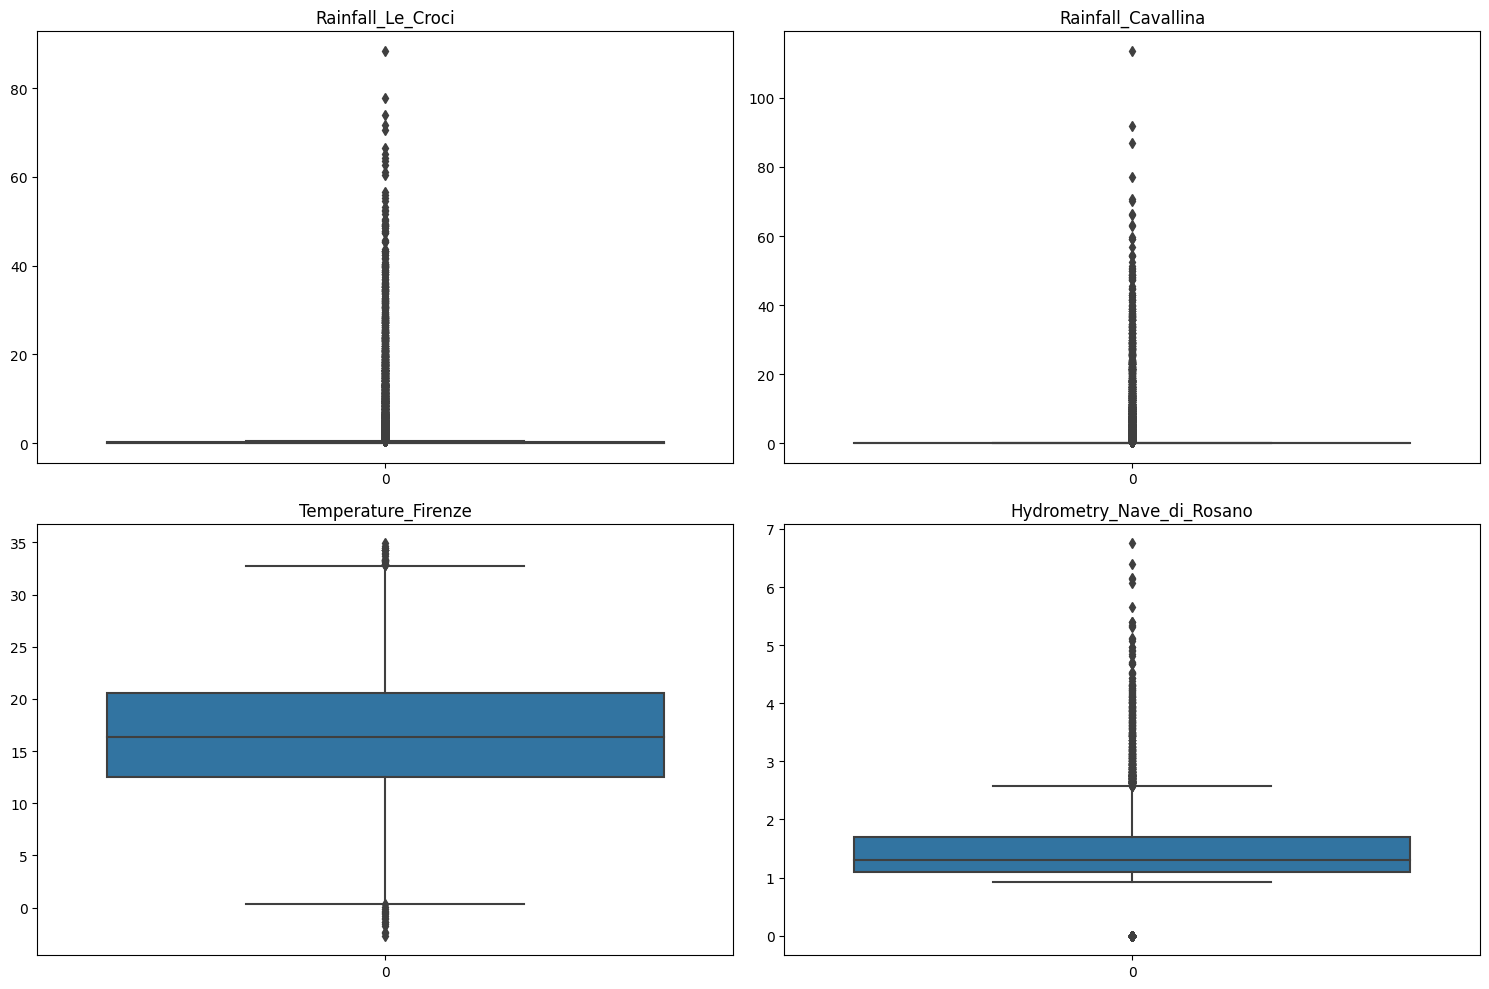

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择要绘制的特征
features_to_plot = ['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data_cleaned[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# 分离特征和目标变量
X = data_cleaned.drop('Hydrometry_Nave_di_Rosano', axis=1)
y = data_cleaned['Hydrometry_Nave_di_Rosano']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_test.shape


((6573, 13), (1644, 13))

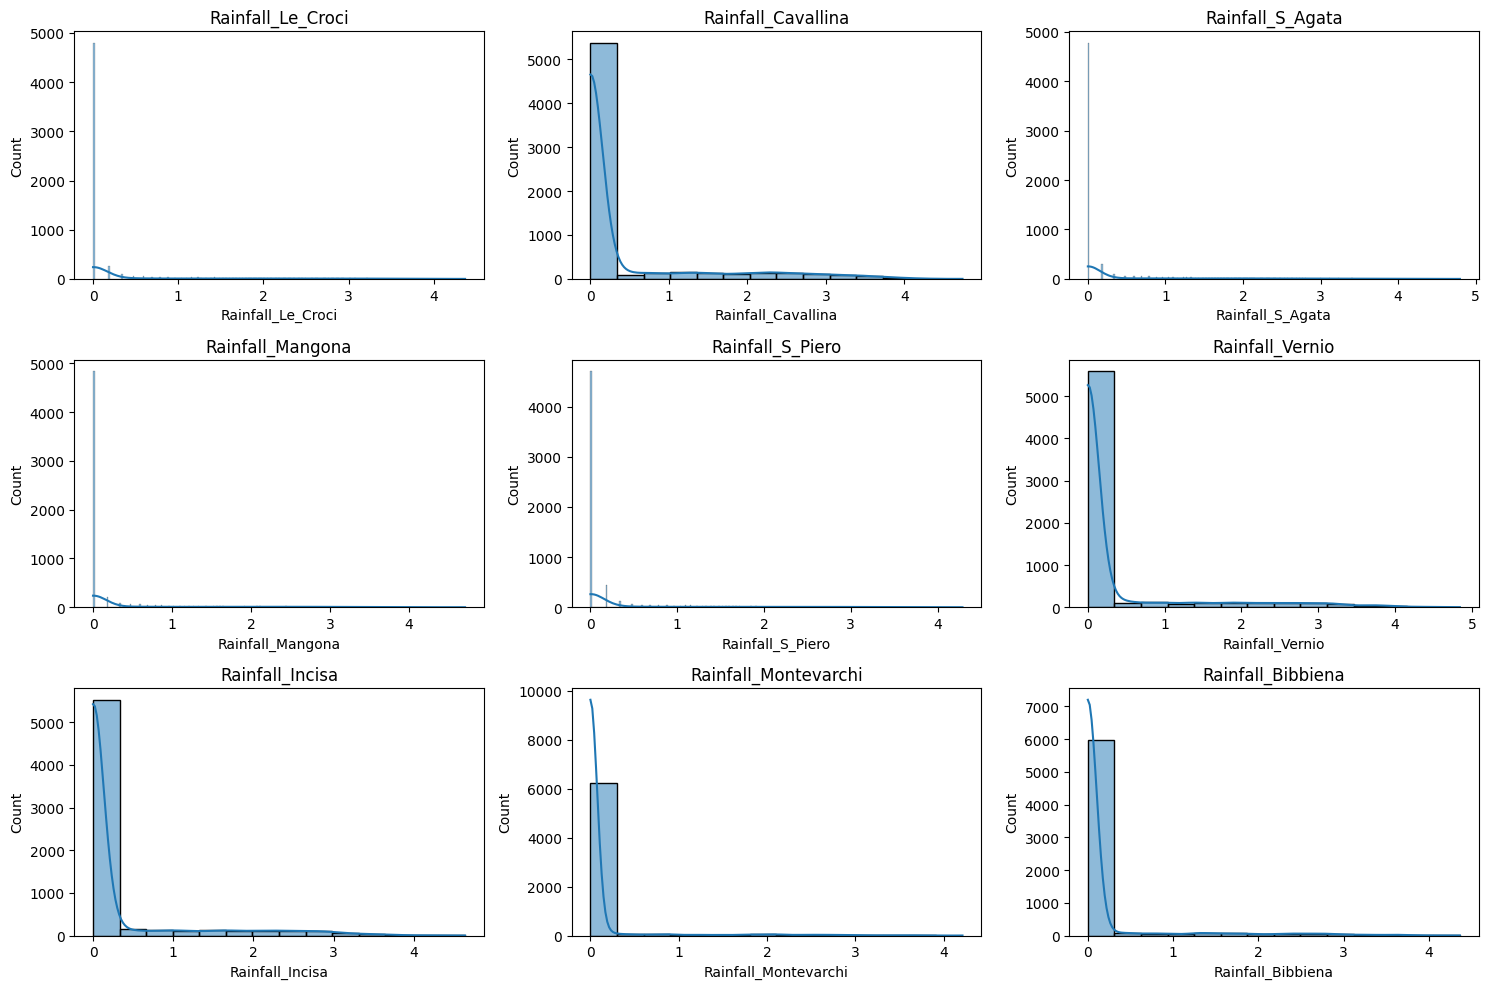

In [9]:
import numpy as np

rainfall_features = [col for col in X_train.columns if 'Rainfall' in col]

# 对训练集的降雨特征进行对数转换
X_train_log = X_train.copy()
X_train_log[rainfall_features] = np.log1p(X_train_log[rainfall_features])

# 绘制转换后的降雨特征的分布
plt.figure(figsize=(15, 10))
for i, feature in enumerate(rainfall_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_train_log[feature], kde=True)
    plt.title(feature)
    plt.tight_layout()

plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test)

# 训练线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_lr = lr_model.predict(X_test_scaled)

# 计算评估指标
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr


(1.2866060459271522, -2.375520336259733)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# 训练随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred_rf = rf_model.predict(X_test_scaled)

# 计算评估指标
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(0.3528386841788318, 0.07429771713337086)